In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set style for seaborn
sns.set(style='whitegrid')

In [3]:
# Load the dataset
df = pd.read_csv(r'C:\Users\shrey\Downloads\Sabudh Project\shreya.csv')


C:\Users\shrey\AppData\Local\Temp\ipykernel_15404\3152629253.py:2: DtypeWarning: Columns (8,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\shrey\Downloads\Sabudh Project\shreya.csv')


In [3]:
print(df.dtypes)

Unnamed: 0.1              int64
Unnamed: 0                int64
isbn                     object
text_reviews_count        int64
series                   object
country_code             object
language_code            object
popular_shelves          object
asin                     object
is_ebook                   bool
average_rating          float64
kindle_asin              object
similar_books            object
description              object
format                   object
link                     object
authors                  object
publisher                object
num_pages               float64
publication_day         float64
isbn13                   object
publication_month       float64
edition_information      object
publication_year        float64
url                      object
image_url                object
book_id                 float64
ratings_count           float64
work_id                 float64
title                    object
title_without_series     object
dtype: o

In [4]:
df.head()

Unnamed: 0.1  Unnamed: 0        isbn  text_reviews_count      series  \
0             0           0  1599150603                   7          []   
1             1           1  1934876569                   6  ['151854']   
2             2           2   590417010                 193          []   
3             3           3  1416904999                   4          []   
4             4           4   531301060                   3          []   

  country_code language_code  \
0           US           NaN   
1           US           NaN   
2           US           eng   
3           US           NaN   
4           US           NaN   

                                     popular_shelves asin  is_ebook  ...  \
0  [{'count': '56', 'name': 'to-read'}, {'count':...  NaN     False  ...   
1  [{'count': '515', 'name': 'to-read'}, {'count'...  NaN     False  ...   
2  [{'count': '450', 'name': 'to-read'}, {'count'...  NaN     False  ...   
3  [{'count': '8', 'name': 'to-read'}, {'count': ...  NaN     False  ...   
4  [{'count': '10', 'name': 'to-read'}, {'count':...  NaN     False  ...   

   publication_month edition_information publication_year  \
0                9.0                 NaN           2006.0   
1                3.0                 NaN           2009.0   
2                9.0                 NaN           1995.0   
3                6.0                 NaN           2005.0   
4                3.0                 NaN           1999.0   

                                                 url  \
0  https://www.goodreads.com/book/show/287141.The...   
1  https://www.goodreads.com/book/show/6066812-al...   
2  https://www.goodreads.com/book/show/89378.Dog_...   
3  https://www.goodreads.com/book/show/1698376.Wh...   
4  https://www.goodreads.com/book/show/2592648-it...   

                                           image_url    book_id ratings_count  \
0  https://s.gr-assets.com/assets/nophoto/book/11...   287141.0          46.0   
1  https://images.gr-assets.com/books/1316637798m...  6066812.0          98.0   
2  https://images.gr-assets.com/books/1360057676m...    89378.0        1331.0   
3  https://s.gr-assets.com/assets/nophoto/book/11...  1698376.0          23.0   
4  https://s.gr-assets.com/assets/nophoto/book/11...  2592648.0          21.0   

     work_id                                              title  \
0   278578.0                      The Aeneid for Boys and Girls   
1   701117.0  All's Fairy in Love and War (Avalon: Web of Ma...   
2    86259.0                                         Dog Heaven   
3  1695373.0                                    What Do You Do?   
4  2613165.0             It's Funny Where Ben's Train Takes Him   

                                title_without_series  
0                      The Aeneid for Boys and Girls  
1  All's Fairy in Love and War (Avalon: Web of Ma...  
2                                         Dog Heaven  
3                                    What Do You Do?  
4             It's Funny Where Ben's Train Takes Him  

[5 rows x 31 columns]

In [5]:
# Display the column names
column_names = df.columns.tolist()
print(column_names)

['Unnamed: 0.1', 'Unnamed: 0', 'isbn', 'text_reviews_count', 'series', 'country_code', 'language_code', 'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin', 'similar_books', 'description', 'format', 'link', 'authors', 'publisher', 'num_pages', 'publication_day', 'isbn13', 'publication_month', 'edition_information', 'publication_year', 'url', 'image_url', 'book_id', 'ratings_count', 'work_id', 'title', 'title_without_series']


In [6]:
# Data types and count of missing values
print(df.info())
missing_values = df.isnull().sum()
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101277 entries, 0 to 101276
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0.1          101277 non-null  int64  
 1   Unnamed: 0            101277 non-null  int64  
 2   isbn                  101276 non-null  object 
 3   text_reviews_count    101277 non-null  int64  
 4   series                101277 non-null  object 
 5   country_code          101277 non-null  object 
 6   language_code         39297 non-null   object 
 7   popular_shelves       101277 non-null  object 
 8   asin                  1 non-null       object 
 9   is_ebook              101277 non-null  bool   
 10  average_rating        101277 non-null  float64
 11  kindle_asin           36299 non-null   object 
 12  similar_books         101277 non-null  object 
 13  description           101277 non-null  object 
 14  format                92438 non-null   object 
 15  

In [4]:
# Drop index columns if they are not needed
# df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
# Example: Convert ISBN columns to string
df['isbn'] = df['isbn'].astype(str)


In [8]:
# Calculate summary statistics for numerical columns
summary_stats = df[['text_reviews_count', 'average_rating', 'ratings_count', 'num_pages']].describe()
print(summary_stats)


       text_reviews_count  average_rating  ratings_count     num_pages
count       101277.000000   101277.000000   1.012770e+05  86423.000000
mean            33.094128        3.894179   6.631117e+02    106.171876
std            299.095306        0.359022   1.212102e+04    114.931419
min              0.000000        0.000000   0.000000e+00      0.000000
25%              3.000000        3.690000   1.400000e+01     32.000000
50%              7.000000        3.930000   3.900000e+01     48.000000
75%             18.000000        4.130000   1.250000e+02    160.000000
max          49850.000000        5.000000   1.876252e+06   3816.000000


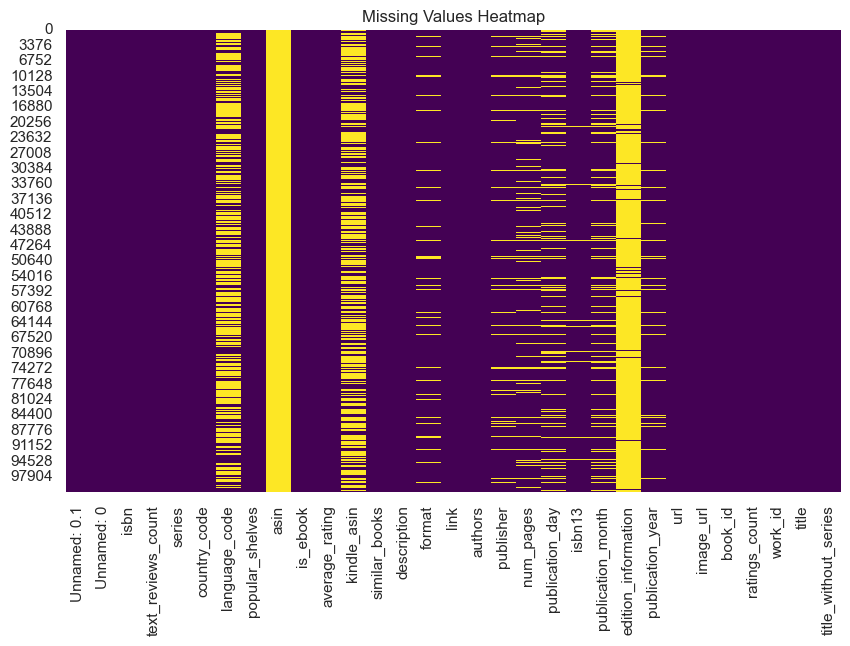

In [9]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


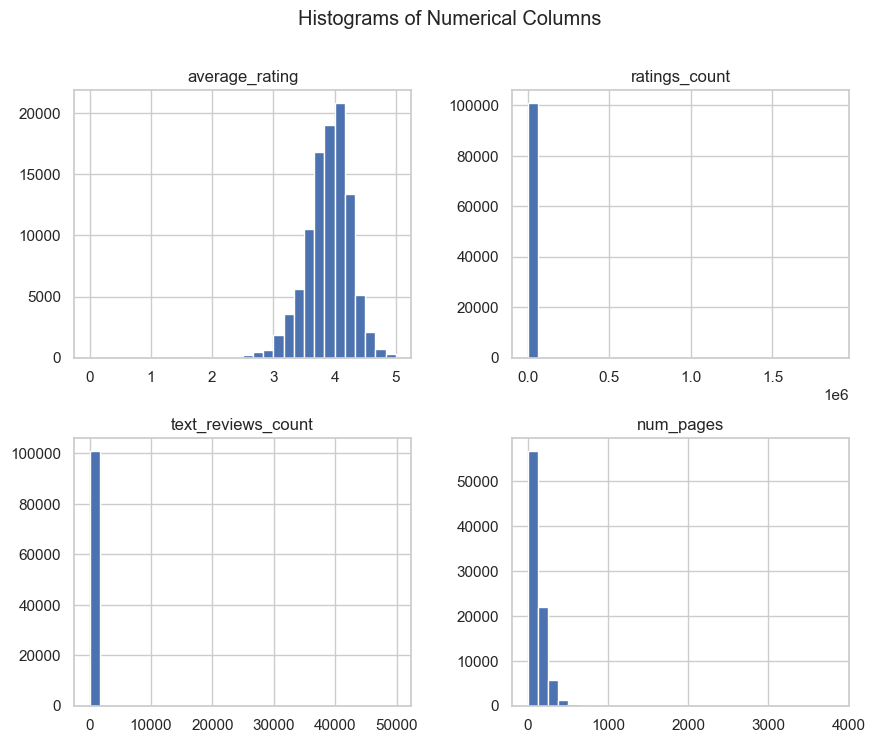

In [10]:
# Plot histograms for numerical columns
df[['average_rating', 'ratings_count', 'text_reviews_count', 'num_pages']].hist(figsize=(10, 8), bins=30)
plt.suptitle('Histograms of Numerical Columns')
plt.show()


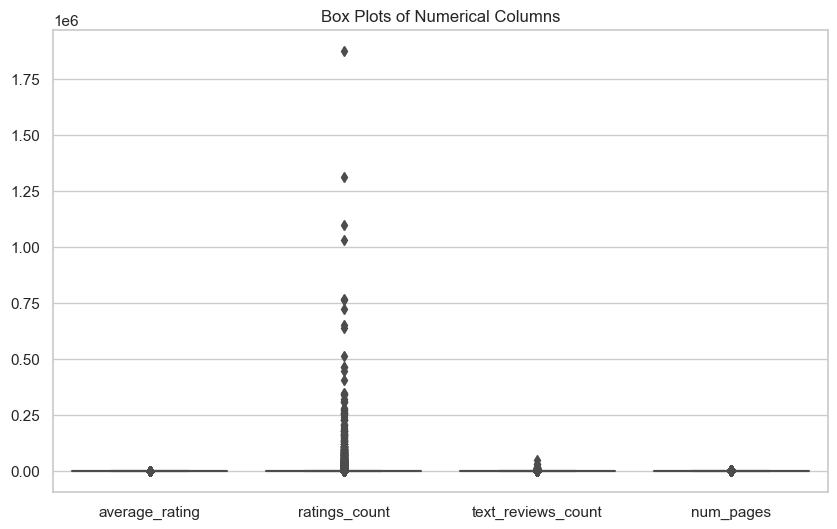

In [11]:
# Create box plots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['average_rating', 'ratings_count', 'text_reviews_count', 'num_pages']])
plt.title('Box Plots of Numerical Columns')
plt.show()


In [12]:
# Count unique values in categorical columns
unique_counts = df[['series', 'country_code', 'language_code', 'popular_shelves', 'authors', 'publisher']].nunique()
print(unique_counts)


series             24587
country_code           1
language_code         72
popular_shelves    77330
authors            49536
publisher           8603
dtype: int64


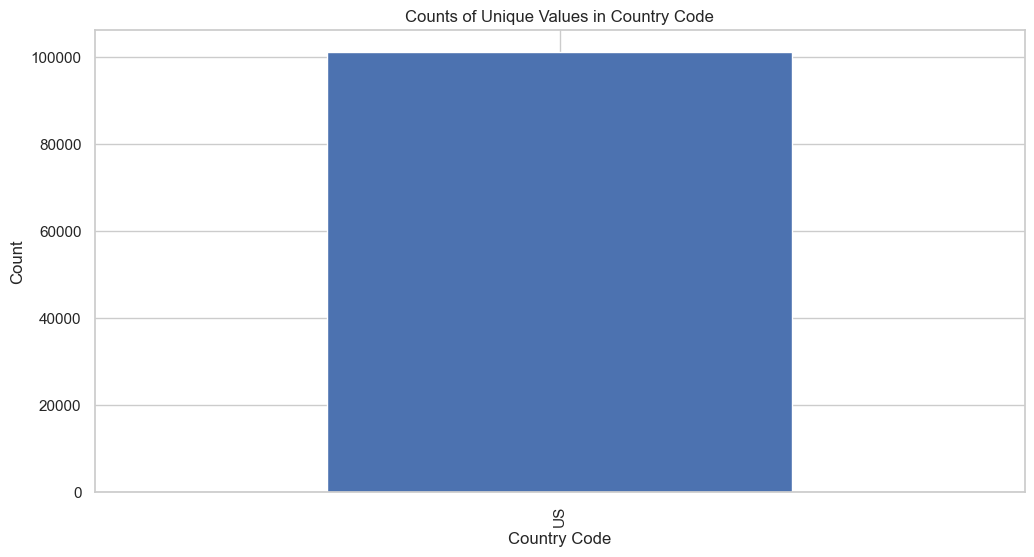

In [13]:
# Visualize counts of unique categories in 'country_code'
plt.figure(figsize=(12, 6))
df['country_code'].value_counts().plot(kind='bar')
plt.title('Counts of Unique Values in Country Code')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.show()


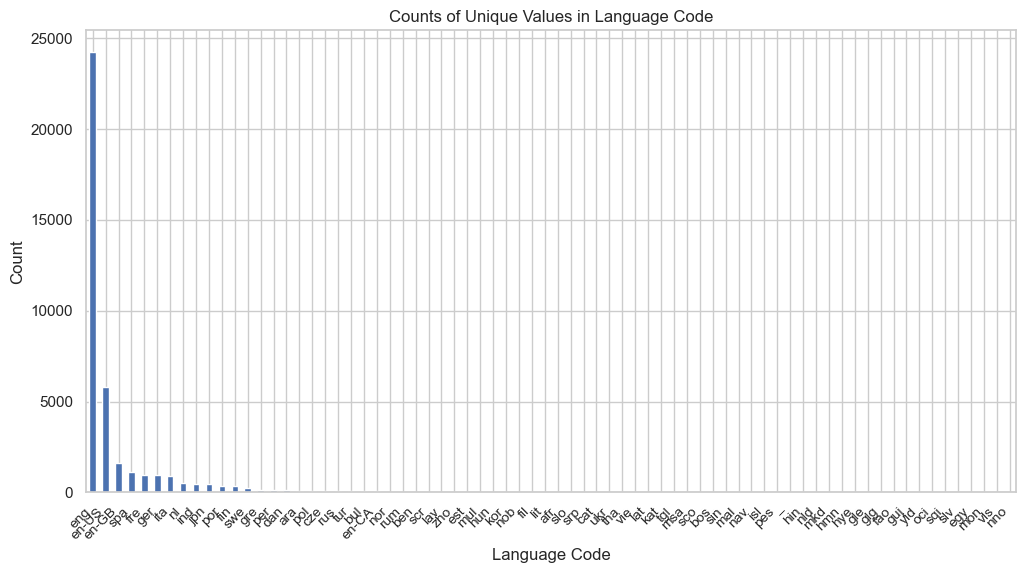

In [16]:
# Visualize counts of unique values in 'language_code'
plt.figure(figsize=(12, 6))
language_counts = df['language_code'].value_counts()

# Plotting
language_counts.plot(kind='bar')
plt.title('Counts of Unique Values in Language Code')
plt.xlabel('Language Code')
plt.ylabel('Count')

# Adjusting x-axis ticks for better spacing
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().set_xticks(range(len(language_counts)))  # Ensuring all ticks are spaced out

plt.show()



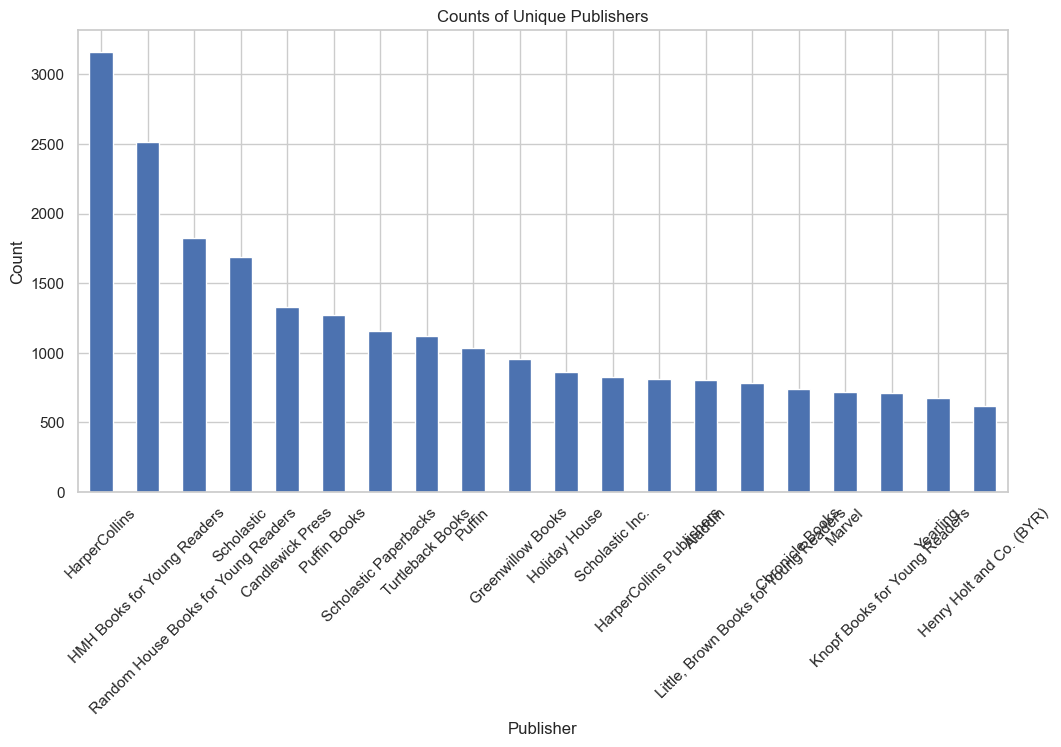

In [18]:
# Visualize counts of unique values in 'publisher'
plt.figure(figsize=(12, 6))
df['publisher'].value_counts().head(20).plot(kind='bar')  # Show top 20 publishers
plt.title('Counts of Unique Publishers')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

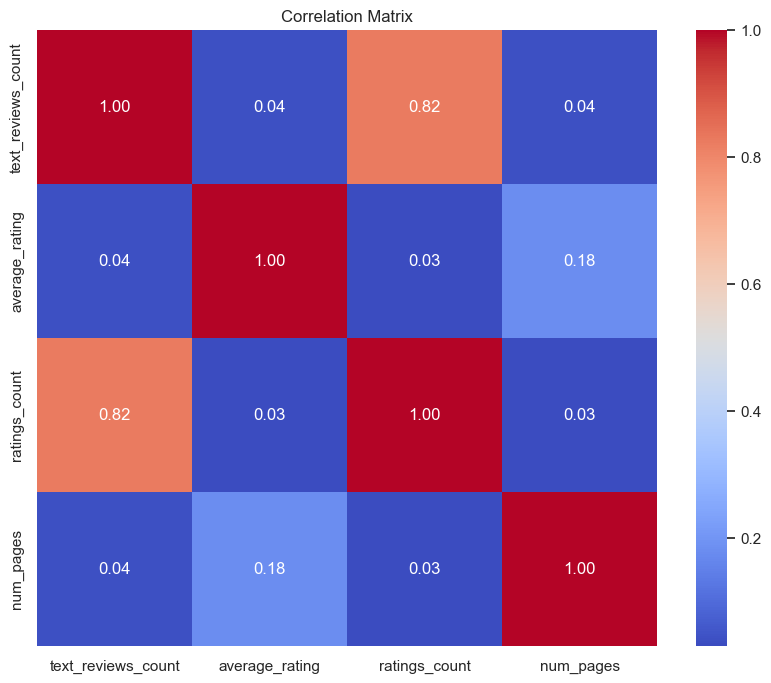

In [19]:

# Compute and visualize correlation matrix
correlation_matrix = df[['text_reviews_count', 'average_rating', 'ratings_count', 'num_pages']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


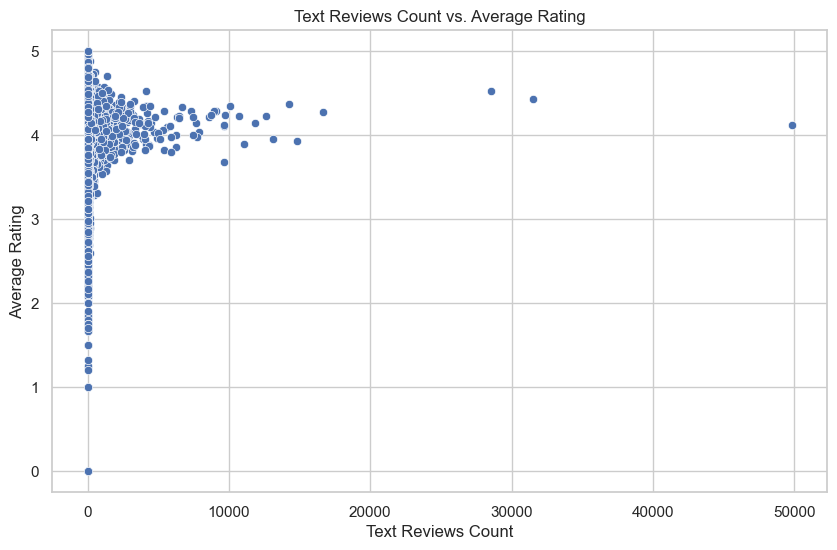

In [20]:
# Analyze relationship between text_reviews_count and average_rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='text_reviews_count', y='average_rating')
plt.title('Text Reviews Count vs. Average Rating')
plt.xlabel('Text Reviews Count')
plt.ylabel('Average Rating')
plt.show()


In [22]:
# Explore unique values in popular_shelves
popular_shelves_counts = df['popular_shelves'].value_counts()
print(popular_shelves_counts)


[{'count': '276875', 'name': 'to-read'}, {'count': '14179', 'name': 'favorites'}, {'count': '9631', 'name': 'classics'}, {'count': '9232', 'name': 'currently-reading'}, {'count': '5329', 'name': 'fiction'}, {'count': '3847', 'name': 'fantasy'}, {'count': '2745', 'name': 'childrens'}, {'count': '2255', 'name': 'children'}, {'count': '1884', 'name': 'classic'}, {'count': '1779', 'name': 'owned'}, {'count': '1600', 'name': 'french'}, {'count': '1512', 'name': 'books-i-own'}, {'count': '1254', 'name': 'favourites'}, {'count': '1223', 'name': 'children-s'}, {'count': '1127', 'name': 'young-adult'}, {'count': '1079', 'name': 'philosophy'}, {'count': '968', 'name': 'children-s-books'}, {'count': '755', 'name': 'childhood'}, {'count': '745', 'name': 'literature'}, {'count': '708', 'name': 'owned-books'}, {'count': '701', 'name': 'kids'}, {'count': '597', 'name': 'childrens-books'}, {'count': '535', 'name': 'french-literature'}, {'count': '497', 'name': 'school'}, {'count': '455', 'name': '1001

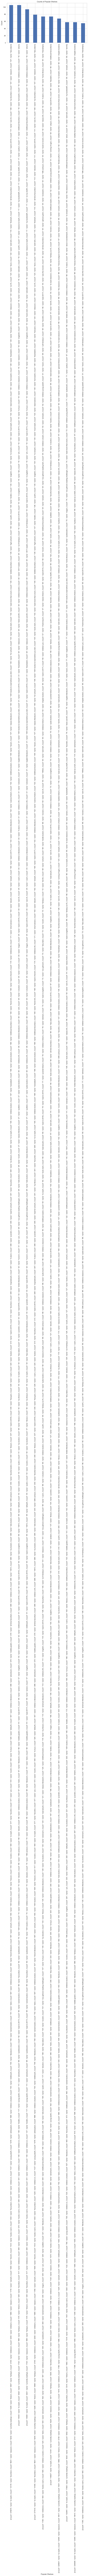

In [37]:
# Visualize popular shelves
# plt.figure(figsize=(12, 6))
# popular_shelves_counts.plot(kind='bar')
# plt.title('Counts of Popular Shelves')
# plt.xlabel('Popular Shelves')
# plt.ylabel('Count')
# plt.show()


# Reduce the size of the data if necessary
popular_shelves_counts = popular_shelves_counts.head(10)  # Example: take top 10

plt.figure(figsize=(10, 5))  # Smaller figure size
popular_shelves_counts.plot(kind='bar', legend=False)
plt.title('Counts of Popular Shelves')
plt.xlabel('Popular Shelves')
plt.ylabel('Count')
# plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [35]:

first_x_value = popular_shelves_counts.index[0]
print("First x-axis value:", first_x_value)


First x-axis value: [{'count': '276875', 'name': 'to-read'}, {'count': '14179', 'name': 'favorites'}, {'count': '9631', 'name': 'classics'}, {'count': '9232', 'name': 'currently-reading'}, {'count': '5329', 'name': 'fiction'}, {'count': '3847', 'name': 'fantasy'}, {'count': '2745', 'name': 'childrens'}, {'count': '2255', 'name': 'children'}, {'count': '1884', 'name': 'classic'}, {'count': '1779', 'name': 'owned'}, {'count': '1600', 'name': 'french'}, {'count': '1512', 'name': 'books-i-own'}, {'count': '1254', 'name': 'favourites'}, {'count': '1223', 'name': 'children-s'}, {'count': '1127', 'name': 'young-adult'}, {'count': '1079', 'name': 'philosophy'}, {'count': '968', 'name': 'children-s-books'}, {'count': '755', 'name': 'childhood'}, {'count': '745', 'name': 'literature'}, {'count': '708', 'name': 'owned-books'}, {'count': '701', 'name': 'kids'}, {'count': '597', 'name': 'childrens-books'}, {'count': '535', 'name': 'french-literature'}, {'count': '497', 'name': 'school'}, {'count': 

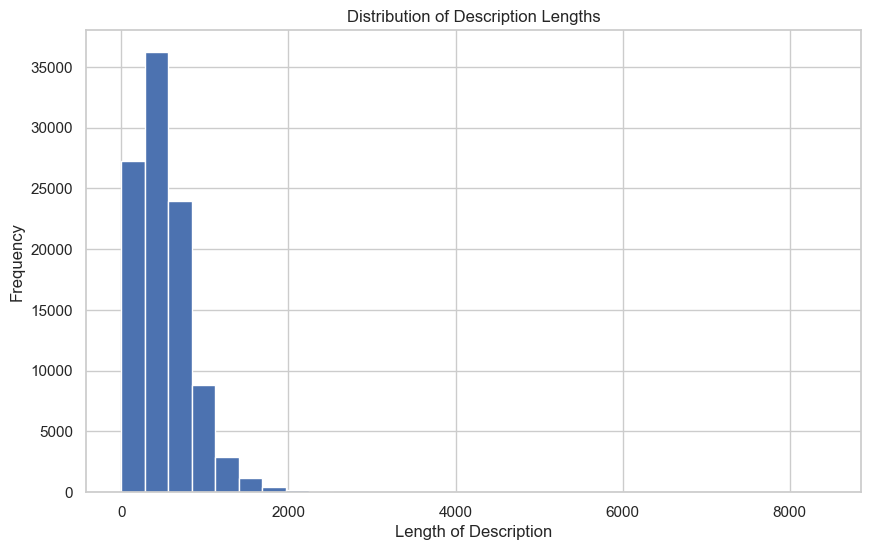

In [25]:
# Length of the description
df['description_length'] = df['description'].str.len()
plt.figure(figsize=(10, 6))
df['description_length'].hist(bins=30)
plt.title('Distribution of Description Lengths')
plt.xlabel('Length of Description')
plt.ylabel('Frequency')
plt.show()



In [26]:

# Identify the book with the longest description
longest_description = df.loc[df['description_length'].idxmax()]
print("Book with the longest description:", longest_description[['title', 'description_length']])

Book with the longest description: title                 Five go to Smuggler's top
description_length                         8434
Name: 89778, dtype: object


In [27]:
# Check for duplicates
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")


Number of duplicate rows: 0


In [28]:
# Check for patterns or duplicates in ISBN relative to Book ID
isbn_counts = df['isbn'].value_counts()
print(isbn_counts)

# Check if there are duplicates in ISBN
duplicate_isbn = isbn_counts[isbn_counts > 1]
print("Duplicate ISBNs:\n", duplicate_isbn)


1935179012    2
159707487X    2
786852577     2
1101476052    2
3570156818    2
             ..
1555919944    1
142400130     1
866114440     1
1447267176    1
1401228747    1
Name: isbn, Length: 101094, dtype: int64
Duplicate ISBNs:
 1935179012    2
159707487X    2
786852577     2
1101476052    2
3570156818    2
             ..
606144501     2
1434246981    2
979923859     2
146772095X    2
8426355056    2
Name: isbn, Length: 183, dtype: int64


In [29]:
# Length of the description
df['description_length'] = df['description'].str.len()
print(f"Maximum length of description: {df['description_length'].max()}")
print(f"Minimum length of description: {df['description_length'].min()}")
print(f"Average length of description: {df['description_length'].mean()}")


Maximum length of description: 8434
Minimum length of description: 1
Average length of description: 516.2579855248476


In [30]:
# Length of authors
df['authors_length'] = df['authors'].str.len()
print(f"Maximum length of authors: {df['authors_length'].max()}")
print(f"Minimum length of authors: {df['authors_length'].min()}")
print(f"Average length of authors: {df['authors_length'].mean()}")


Maximum length of authors: 2427
Minimum length of authors: 33
Average length of authors: 65.98706517768102


In [31]:
# Length of publisher
df['publisher_length'] = df['publisher'].str.len()
print(f"Maximum length of publisher: {df['publisher_length'].max()}")
print(f"Minimum length of publisher: {df['publisher_length'].min()}")
print(f"Average length of publisher: {df['publisher_length'].mean()}")


Maximum length of publisher: 86.0
Minimum length of publisher: 2.0
Average length of publisher: 17.21590652578173


In [5]:
# Check if the same ISBN is associated with multiple Book IDs
isbn_multiple_book_ids = df.groupby('isbn')['book_id'].nunique()
isbn_multiple_book_ids = isbn_multiple_book_ids[isbn_multiple_book_ids > 1]

print("ISBNs associated with multiple Book IDs:")
print(isbn_multiple_book_ids)

# Check if the same Book ID is associated with multiple ISBNs
book_id_multiple_isbns = df.groupby('book_id')['isbn'].nunique()
book_id_multiple_isbns = book_id_multiple_isbns[book_id_multiple_isbns > 1]

print("\nBook IDs associated with multiple ISBNs:")
print(book_id_multiple_isbns)

ISBNs associated with multiple Book IDs:
Series([], Name: book_id, dtype: int64)

Book IDs associated with multiple ISBNs:
Series([], Name: isbn, dtype: int64)
